### 使用梯度上升法求解主成分

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

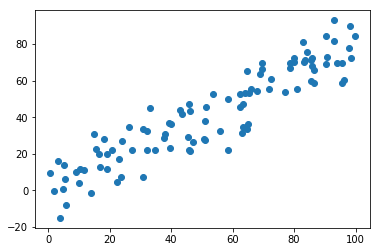

In [7]:
plt.scatter(X[:,0], X[:,1])

### demean

In [8]:
def demean(X):
    return X - np.mean(X, axis=0)

In [9]:
X_demean = demean(X)

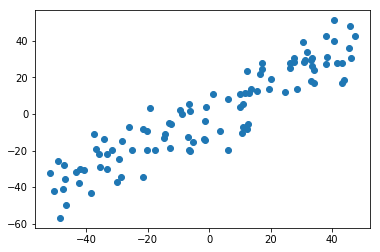

In [10]:
plt.scatter(X_demean[:,0], X_demean[:,1])

In [11]:
np.mean(X_demean[:, 0])

1.9042545318370686e-14

In [12]:
np.mean(X_demean[:, 1])

-1.3500311979441904e-15

### 梯度上升法

In [13]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    
    w = direction(initial_w) 
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) # 注意1：每次求一个单位方向
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1

    return w

In [14]:
initial_w = np.random.random(X.shape[1]) # 注意2：不能用0向量开始
initial_w

array([0.90626879, 0.87505689])